In [2]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Lod dataset 
df = pd.read_csv(r"C:\Users\cease\Documents\Datasets\End to End Projects\Califonia Housing Prediction.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Data Summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

columns = ['total_bedrooms']

# Create a SimpleImputer object with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the specified columns
imputer.fit(df[columns])

# Transform and replace missing values in the DataFrame
df[columns] = imputer.transform(df[columns])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [8]:
# Remove outliers 
def remove_outliers_iqr(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    outliers_removed = data[(data >= lower_bound) & (data <= upper_bound)]
    
    return outliers_removed

# Remove outliers from 'Median_House_Value' column
df['median_house_value'] = remove_outliers_iqr(df['median_house_value'])


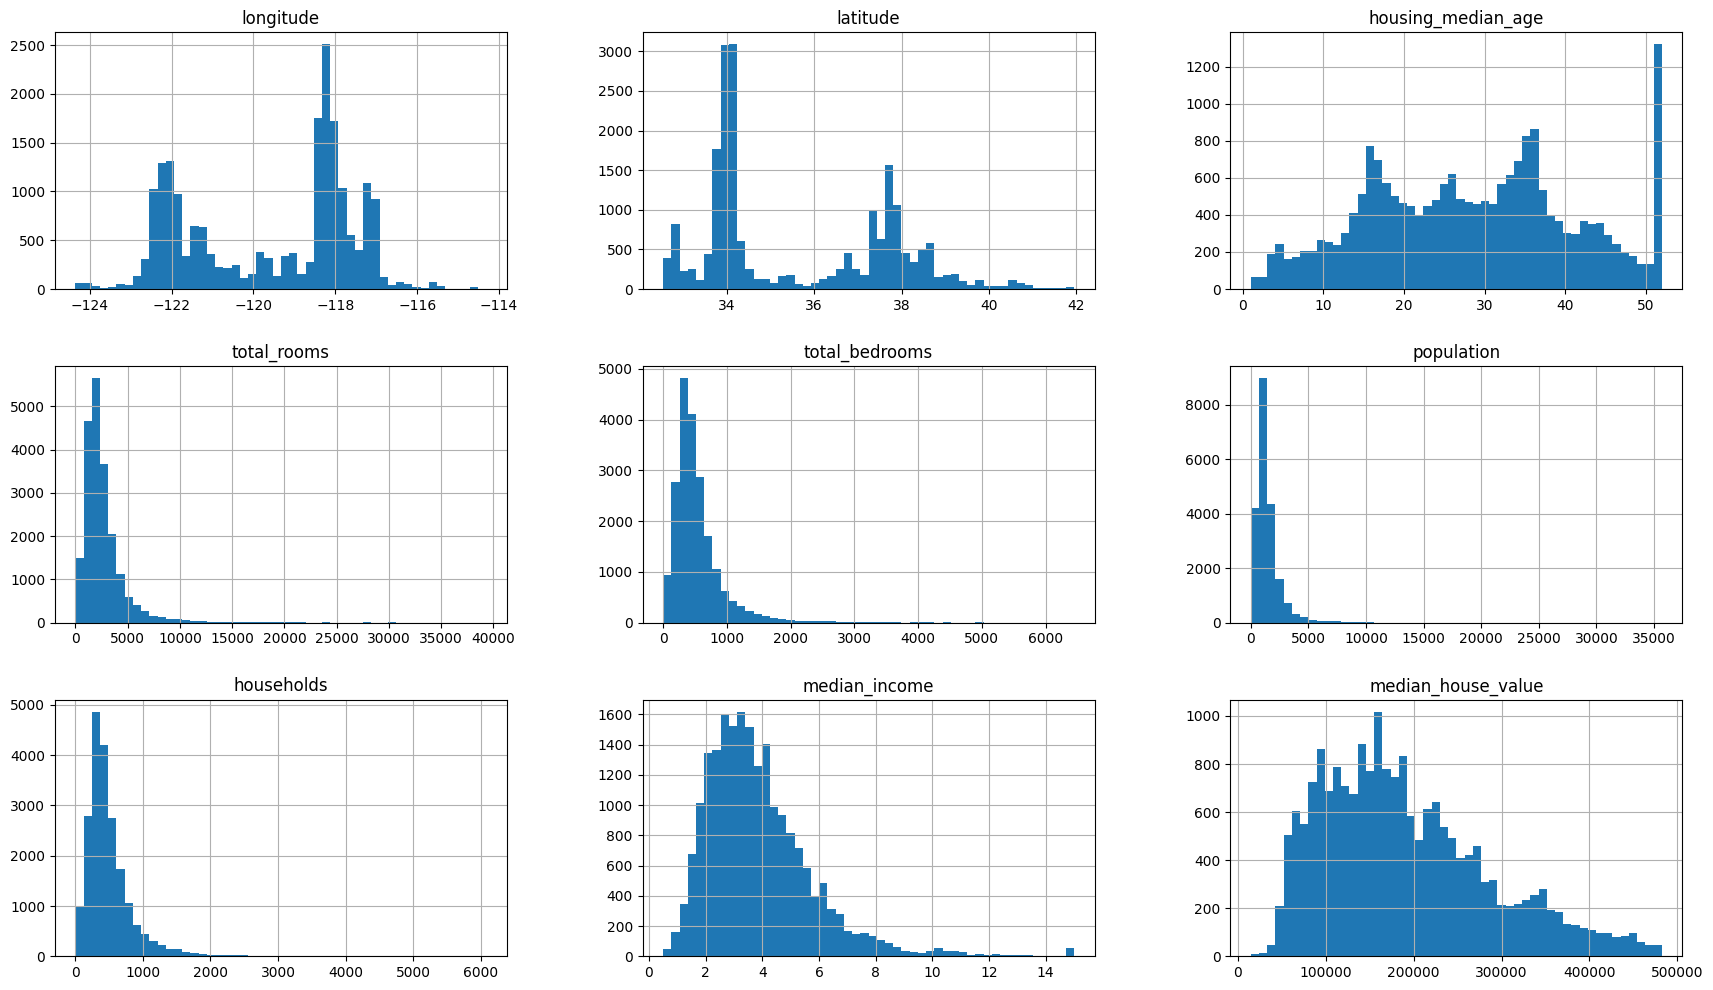

In [9]:
# Data distribution for numeric columns 
df.hist(bins=50, figsize=(21, 12))

plt.show()

In [10]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [11]:
# Define a dictionary with the new column names
new_column_names = {
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'housing_median_age': 'Housing Median Age',
    'total_rooms': 'Total Rooms',
    'total_bedrooms': 'Total Bedrooms',
    'population': 'Population',
    'households': 'Households',
    'median_income': 'Median Income',
    'median_house_value': 'Median House Value',
    'ocean_proximity': 'Ocean Proximity'
}

# Rename columns using the rename method with the dictionary
df = df.rename(columns=new_column_names)


In [12]:
df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Ocean Proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# Remove 'Median House Value' column and store its values
median_house_value_col = df.pop('Median House Value')

# Add 'Median House Value' column back to the DataFrame as the last column
df = df.assign(**{'Median House Value': median_house_value_col})

# Check the new order of columns
print(df.columns)

Index(['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms',
       'Total Bedrooms', 'Population', 'Households', 'Median Income',
       'Ocean Proximity', 'Median House Value'],
      dtype='object')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Longitude           20640 non-null  float64
 1   Latitude            20640 non-null  float64
 2   Housing Median Age  20640 non-null  float64
 3   Total Rooms         20640 non-null  float64
 4   Total Bedrooms      20640 non-null  float64
 5   Population          20640 non-null  float64
 6   Households          20640 non-null  float64
 7   Median Income       20640 non-null  float64
 8   Ocean Proximity     20640 non-null  object 
 9   Median House Value  19569 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
# Now, to convert 'df' to a CSV file, use the to_csv method
df.to_csv('California Housing.csv', index=False)

In [17]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['Ocean Proximity']

# Create a copy of the DataFrame with the selected columns
encoded_df = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(encoded_df[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    encoded_df = pd.concat([encoded_df, one_hot_df], axis=1)

    # Drop the original categorical column
    encoded_df = encoded_df.drop([column], axis=1)

# Display the resulting DataFrame
df = encoded_df.copy()

df.head()

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value,Ocean Proximity_INLAND,Ocean Proximity_ISLAND,Ocean Proximity_NEAR BAY,Ocean Proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,1.0,0.0


In [21]:
# Remove 'Median House Value' column and store its values
median_house_value_col = df.pop('Median House Value')

# Add 'Median House Value' column back to the DataFrame as the last column
df = df.assign(**{'Median House Value': median_house_value_col})

# Check the new order of columns
print(df.columns)

Index(['Longitude', 'Latitude', 'Housing Median Age', 'Total Rooms',
       'Total Bedrooms', 'Population', 'Households', 'Median Income',
       'Ocean Proximity_INLAND', 'Ocean Proximity_ISLAND',
       'Ocean Proximity_NEAR BAY', 'Ocean Proximity_NEAR OCEAN',
       'Median House Value'],
      dtype='object')


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# Define the features and target variable 

# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'Median House Value'})

# Target variable 
y = df['Median House Value']

In [24]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

### XGBRegressor

In [26]:

def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor()

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

MAE: 28245.340376692642
R2: 0.8131547466266865
MAPE: 17.020096307324977
MSE: 1707232162.1366868
RMSE: 41318.66602561955


### Random Forest

In [27]:


def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    rf_model = RandomForestRegressor()

    # Fit the model on the entire training data
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

MAE: 29516.065505024693
R2: 0.7965507163214425
MAPE: 17.73395151042942
MSE: 1858945593.6872768
RMSE: 43115.49134229224


### XGBRegressor using stratified KFold

In [28]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np
import pandas as pd

# Define the XGBoost model
xgb_model = XGBRegressor()

# Define the number of folds for cross-validation
n_folds = 10

# Create a KFold object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics
mae_scores = []
r2_scores = []
mape_scores = []
mse_scores = []
rmse_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize the standard scaler
    scaler = StandardScaler()

    # Fit and transform the training data
    X_train_scaled = scaler.fit_transform(X_train)

    # Transform the testing data
    X_test_scaled = scaler.transform(X_test)

    # Fit the model on the training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the evaluation metrics
    mae_scores.append(mae)
    r2_scores.append(r2)
    mape_scores.append(mape)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

# Calculate the average evaluation metrics
mae_avg = np.mean(mae_scores)
r2_avg = np.mean(r2_scores)
mape_avg = np.mean(mape_scores)
mse_avg = np.mean(mse_scores)
rmse_avg = np.mean(rmse_scores)

# Print the average evaluation metrics
print("MAE:", mae_avg)
print("R2:", r2_avg)
print("MAPE:", mape_avg)
print("MSE:", mse_avg)
print("RMSE:", rmse_avg)

MAE: 28266.147002812166
R2: 0.8075228843409452
MAPE: 16.811813107293144
MSE: 1752662142.3458896
RMSE: 41851.79371803368


## Hyperparameter tuning with optuna

In [30]:
import optuna

def objective(trial):
    # Define hyperparameters to search
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'random_state': 42  # Fixed random state for reproducibility
    }
    
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor(**params)

    # Fit the model on the entire training data
    xgb_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test_scaled)

    # Evaluate the model on the testing data (MAE)
    mae_test = mean_absolute_error(y_test, y_pred)

    return mae_test


e:\MLproject\calihousepred\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
study = optuna.create_study(direction='minimize')  # Minimize MAE
study.optimize(objective, n_trials=100, show_progress_bar=True, n_jobs= -1)  # Adjust n_trials as needed

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-03-25 07:19:32,539] A new study created in memory with name: no-name-9364214a-f2bb-4e25-b481-19c0e5e18ab0
Best trial: 1. Best value: 40003.2:   1%|          | 1/100 [00:00<01:12,  1.37it/s]

[I 2024-03-25 07:19:33,368] Trial 1 finished with value: 40003.22202118482 and parameters: {'n_estimators': 30, 'max_depth': 4, 'learning_rate': 0.09854553223714779, 'subsample': 0.840060718633957, 'colsample_bytree': 0.8742111678080424, 'gamma': 0.410278830760879, 'reg_alpha': 0.0009504986742161013, 'reg_lambda': 7.167549018259424}. Best is trial 1 with value: 40003.22202118482.


Best trial: 1. Best value: 40003.2:   2%|▏         | 2/100 [00:01<00:54,  1.78it/s]

[I 2024-03-25 07:19:33,809] Trial 0 finished with value: 40763.53972552403 and parameters: {'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.05348688358324516, 'subsample': 0.873547478988115, 'colsample_bytree': 0.8108099965636799, 'gamma': 0.02509522555199169, 'reg_alpha': 2.3473374571025882, 'reg_lambda': 0.00045095978311147076}. Best is trial 1 with value: 40003.22202118482.


Best trial: 1. Best value: 40003.2:   3%|▎         | 3/100 [00:01<00:42,  2.28it/s]

[I 2024-03-25 07:19:34,105] Trial 4 finished with value: 75615.29100364263 and parameters: {'n_estimators': 27, 'max_depth': 5, 'learning_rate': 0.0019885835987299367, 'subsample': 0.9492156470746236, 'colsample_bytree': 0.741212221065924, 'gamma': 0.054949682650623353, 'reg_alpha': 0.8832912276530664, 'reg_lambda': 0.018725196768845785}. Best is trial 1 with value: 40003.22202118482.


Best trial: 3. Best value: 34948.5:   4%|▍         | 4/100 [00:02<00:55,  1.73it/s]

[I 2024-03-25 07:19:34,894] Trial 3 finished with value: 34948.53254808921 and parameters: {'n_estimators': 97, 'max_depth': 4, 'learning_rate': 0.059674494148347385, 'subsample': 0.9257872030496961, 'colsample_bytree': 0.8079626579929515, 'gamma': 0.021442986890778136, 'reg_alpha': 0.029384242021994186, 'reg_lambda': 9.601800108724171e-05}. Best is trial 3 with value: 34948.53254808921.


Best trial: 3. Best value: 34948.5:   5%|▌         | 5/100 [00:03<01:07,  1.41it/s]

[I 2024-03-25 07:19:35,838] Trial 6 finished with value: 48152.074318603016 and parameters: {'n_estimators': 24, 'max_depth': 10, 'learning_rate': 0.03267437921566413, 'subsample': 0.9905965234575188, 'colsample_bytree': 0.7406068607475282, 'gamma': 0.07651745809335923, 'reg_alpha': 0.00038234984252935616, 'reg_lambda': 0.00044366667690512755}. Best is trial 3 with value: 34948.53254808921.


Best trial: 7. Best value: 31351.9:   6%|▌         | 6/100 [00:03<01:03,  1.49it/s]

[I 2024-03-25 07:19:36,439] Trial 7 finished with value: 31351.890970491437 and parameters: {'n_estimators': 52, 'max_depth': 6, 'learning_rate': 0.0953123914161106, 'subsample': 0.7416226599725737, 'colsample_bytree': 0.9020784578288294, 'gamma': 0.3246624965030474, 'reg_alpha': 0.011669195418918301, 'reg_lambda': 0.31382155914936627}. Best is trial 7 with value: 31351.890970491437.


Best trial: 7. Best value: 31351.9:   7%|▋         | 7/100 [00:04<00:50,  1.83it/s]

[I 2024-03-25 07:19:36,724] Trial 5 finished with value: 31992.49359343047 and parameters: {'n_estimators': 74, 'max_depth': 7, 'learning_rate': 0.04419703291982965, 'subsample': 0.8088291484956063, 'colsample_bytree': 0.8707793657240059, 'gamma': 0.3202883584318852, 'reg_alpha': 0.014568939824792716, 'reg_lambda': 0.0004310341325367234}. Best is trial 7 with value: 31351.890970491437.


Best trial: 2. Best value: 27055.6:  10%|█         | 10/100 [00:04<00:31,  2.90it/s]

[I 2024-03-25 07:19:37,391] Trial 8 finished with value: 34583.93359774412 and parameters: {'n_estimators': 42, 'max_depth': 7, 'learning_rate': 0.05696322241261228, 'subsample': 0.8688365133651412, 'colsample_bytree': 0.8572442163086418, 'gamma': 0.19734212595871856, 'reg_alpha': 1.7303048005504093e-05, 'reg_lambda': 0.0002774555191041108}. Best is trial 7 with value: 31351.890970491437.
[I 2024-03-25 07:19:37,422] Trial 9 finished with value: 48015.35058394044 and parameters: {'n_estimators': 14, 'max_depth': 9, 'learning_rate': 0.05528138066338448, 'subsample': 0.9016882688116087, 'colsample_bytree': 0.8986396470659976, 'gamma': 0.12277868916148536, 'reg_alpha': 1.2826600576283846, 'reg_lambda': 0.029660893000627023}. Best is trial 7 with value: 31351.890970491437.
[I 2024-03-25 07:19:37,555] Trial 2 finished with value: 27055.592393996038 and parameters: {'n_estimators': 77, 'max_depth': 10, 'learning_rate': 0.09689722101433057, 'subsample': 0.947366383384048, 'colsample_bytree': 0

Best trial: 2. Best value: 27055.6:  11%|█         | 11/100 [00:05<00:28,  3.08it/s]

[I 2024-03-25 07:19:37,820] Trial 10 finished with value: 34697.08981978527 and parameters: {'n_estimators': 19, 'max_depth': 9, 'learning_rate': 0.09690773386237268, 'subsample': 0.8144606401445279, 'colsample_bytree': 0.8853315478584003, 'gamma': 0.026397743436452157, 'reg_alpha': 2.1342134605980418e-05, 'reg_lambda': 9.963713708954895}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  12%|█▏        | 12/100 [00:06<01:03,  1.39it/s]

[I 2024-03-25 07:19:39,636] Trial 14 finished with value: 30334.87536945616 and parameters: {'n_estimators': 70, 'max_depth': 6, 'learning_rate': 0.07842743759589982, 'subsample': 0.7081797562885829, 'colsample_bytree': 0.9956131845844808, 'gamma': 0.9370709040203407, 'reg_alpha': 0.1617105758762584, 'reg_lambda': 0.5468458030861878}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  14%|█▍        | 14/100 [00:07<00:48,  1.77it/s]

[I 2024-03-25 07:19:40,445] Trial 12 finished with value: 29212.404189033743 and parameters: {'n_estimators': 93, 'max_depth': 7, 'learning_rate': 0.05778699594090104, 'subsample': 0.8756081833683076, 'colsample_bytree': 0.743123257504076, 'gamma': 0.5952619397524888, 'reg_alpha': 9.249181316808371e-05, 'reg_lambda': 0.02263763677360453}. Best is trial 2 with value: 27055.592393996038.
[I 2024-03-25 07:19:40,550] Trial 11 finished with value: 28986.601758211913 and parameters: {'n_estimators': 95, 'max_depth': 7, 'learning_rate': 0.06127559928327265, 'subsample': 0.9160046131615021, 'colsample_bytree': 0.6073860357988922, 'gamma': 0.5897363721543569, 'reg_alpha': 1.4220831202842146, 'reg_lambda': 0.00010623379777737454}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  15%|█▌        | 15/100 [00:08<00:48,  1.75it/s]

[I 2024-03-25 07:19:41,141] Trial 13 finished with value: 28011.92987122955 and parameters: {'n_estimators': 73, 'max_depth': 9, 'learning_rate': 0.08052188465467183, 'subsample': 0.6215295442679898, 'colsample_bytree': 0.9848103258762126, 'gamma': 0.010156740368700618, 'reg_alpha': 0.348920952895285, 'reg_lambda': 2.002611020234375e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  16%|█▌        | 16/100 [00:11<01:50,  1.31s/it]

[I 2024-03-25 07:19:44,254] Trial 15 finished with value: 28130.451723063652 and parameters: {'n_estimators': 74, 'max_depth': 8, 'learning_rate': 0.07783244414646753, 'subsample': 0.6411256611608457, 'colsample_bytree': 0.9980278123037194, 'gamma': 0.9019368216737784, 'reg_alpha': 0.1600560941598327, 'reg_lambda': 1.2659453907937863e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  17%|█▋        | 17/100 [00:15<02:41,  1.94s/it]

[I 2024-03-25 07:19:47,704] Trial 17 finished with value: 27153.399751565696 and parameters: {'n_estimators': 79, 'max_depth': 9, 'learning_rate': 0.07893082038066151, 'subsample': 0.9954494249383046, 'colsample_bytree': 0.635466835299896, 'gamma': 0.8888476984834284, 'reg_alpha': 8.952791389058817, 'reg_lambda': 1.0498327600647483e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  18%|█▊        | 18/100 [00:15<02:05,  1.53s/it]

[I 2024-03-25 07:19:48,257] Trial 16 finished with value: 27159.635832055214 and parameters: {'n_estimators': 99, 'max_depth': 8, 'learning_rate': 0.0773545793499357, 'subsample': 0.9974093701953184, 'colsample_bytree': 0.6047520381001653, 'gamma': 0.9726798101753346, 'reg_alpha': 0.0005761648771119822, 'reg_lambda': 1.8282522740321338e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  19%|█▉        | 19/100 [00:17<02:07,  1.58s/it]

[I 2024-03-25 07:19:49,950] Trial 18 finished with value: 27744.64057906761 and parameters: {'n_estimators': 74, 'max_depth': 10, 'learning_rate': 0.07941269935116362, 'subsample': 0.6391611414636676, 'colsample_bytree': 0.9980543457463014, 'gamma': 0.04747253156196004, 'reg_alpha': 7.631130310164521, 'reg_lambda': 1.1827924393397913e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 2. Best value: 27055.6:  20%|██        | 20/100 [00:19<02:23,  1.79s/it]

[I 2024-03-25 07:19:52,239] Trial 19 finished with value: 27873.306912225205 and parameters: {'n_estimators': 65, 'max_depth': 10, 'learning_rate': 0.0783395685542757, 'subsample': 0.6083408171537709, 'colsample_bytree': 0.9486861739217106, 'gamma': 0.011164782327407988, 'reg_alpha': 0.16350637586194874, 'reg_lambda': 1.1257368252638203e-05}. Best is trial 2 with value: 27055.592393996038.


Best trial: 20. Best value: 26660.4:  21%|██        | 21/100 [00:29<05:34,  4.24s/it]

[I 2024-03-25 07:20:02,237] Trial 20 finished with value: 26660.361008595348 and parameters: {'n_estimators': 83, 'max_depth': 10, 'learning_rate': 0.08670830515129702, 'subsample': 0.997761057407957, 'colsample_bytree': 0.6198090187358625, 'gamma': 0.21040204589404318, 'reg_alpha': 9.722789819523506, 'reg_lambda': 0.004000298069687473}. Best is trial 20 with value: 26660.361008595348.


Best trial: 20. Best value: 26660.4:  22%|██▏       | 22/100 [00:32<04:53,  3.76s/it]

[I 2024-03-25 07:20:04,867] Trial 21 finished with value: 27020.433983176765 and parameters: {'n_estimators': 85, 'max_depth': 10, 'learning_rate': 0.08737949946636937, 'subsample': 0.9540843458988149, 'colsample_bytree': 0.6677193228850862, 'gamma': 0.16116741266669976, 'reg_alpha': 7.412751362604283, 'reg_lambda': 0.0029957288162534203}. Best is trial 20 with value: 26660.361008595348.


Best trial: 20. Best value: 26660.4:  23%|██▎       | 23/100 [00:32<03:36,  2.81s/it]

[I 2024-03-25 07:20:05,443] Trial 22 finished with value: 26861.885973846496 and parameters: {'n_estimators': 83, 'max_depth': 10, 'learning_rate': 0.0885968236368878, 'subsample': 0.9526911053955108, 'colsample_bytree': 0.6694570934168582, 'gamma': 0.15550977988526443, 'reg_alpha': 5.6993666604577, 'reg_lambda': 0.0020154719160501416}. Best is trial 20 with value: 26660.361008595348.


Best trial: 20. Best value: 26660.4:  24%|██▍       | 24/100 [00:33<02:44,  2.17s/it]

[I 2024-03-25 07:20:06,118] Trial 23 finished with value: 27491.44178169734 and parameters: {'n_estimators': 86, 'max_depth': 8, 'learning_rate': 0.08713740649071816, 'subsample': 0.9515945685787165, 'colsample_bytree': 0.6742294572611888, 'gamma': 0.14768356465585633, 'reg_alpha': 9.054996045318864, 'reg_lambda': 0.003528102520072808}. Best is trial 20 with value: 26660.361008595348.


Best trial: 20. Best value: 26660.4:  25%|██▌       | 25/100 [00:38<03:46,  3.03s/it]

[I 2024-03-25 07:20:11,150] Trial 26 finished with value: 27055.88554847265 and parameters: {'n_estimators': 87, 'max_depth': 8, 'learning_rate': 0.08830697005610234, 'subsample': 0.958258887281463, 'colsample_bytree': 0.6778950438067197, 'gamma': 0.16199268801125238, 'reg_alpha': 4.033495013678167, 'reg_lambda': 0.003299445195549678}. Best is trial 20 with value: 26660.361008595348.


Best trial: 24. Best value: 26646.6:  26%|██▌       | 26/100 [00:39<02:57,  2.40s/it]

[I 2024-03-25 07:20:12,082] Trial 24 finished with value: 26646.624490749615 and parameters: {'n_estimators': 85, 'max_depth': 10, 'learning_rate': 0.08865424850023564, 'subsample': 0.9675164756112977, 'colsample_bytree': 0.6708385086358581, 'gamma': 0.17032437933642589, 'reg_alpha': 8.957836211142727, 'reg_lambda': 0.003050533291972075}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  27%|██▋       | 27/100 [00:40<02:26,  2.00s/it]

[I 2024-03-25 07:20:13,166] Trial 25 finished with value: 27152.807107937115 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.08890131737228887, 'subsample': 0.9528588012844112, 'colsample_bytree': 0.6553127504306474, 'gamma': 0.17150268354878898, 'reg_alpha': 4.2975761284075285, 'reg_lambda': 0.003588703420943282}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  28%|██▊       | 28/100 [00:41<02:04,  1.72s/it]

[I 2024-03-25 07:20:14,227] Trial 27 finished with value: 26979.375097855955 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.07106240440491751, 'subsample': 0.961095259887173, 'colsample_bytree': 0.6857957148969959, 'gamma': 0.18692362924797418, 'reg_alpha': 3.1433153728503522, 'reg_lambda': 0.0028094049348422905}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  29%|██▉       | 29/100 [00:43<01:58,  1.67s/it]

[I 2024-03-25 07:20:15,777] Trial 31 finished with value: 40534.016647494886 and parameters: {'n_estimators': 61, 'max_depth': 3, 'learning_rate': 0.06805402805287711, 'subsample': 0.916791165434852, 'colsample_bytree': 0.7186628421065806, 'gamma': 0.0870290305358915, 'reg_alpha': 0.4942779126092378, 'reg_lambda': 0.07591619128238909}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  30%|███       | 30/100 [00:45<02:03,  1.76s/it]

[I 2024-03-25 07:20:17,745] Trial 29 finished with value: 28087.21112921779 and parameters: {'n_estimators': 62, 'max_depth': 9, 'learning_rate': 0.0689148491693331, 'subsample': 0.7710373153323967, 'colsample_bytree': 0.7103903152754952, 'gamma': 0.23478285580213307, 'reg_alpha': 0.46011986874890093, 'reg_lambda': 0.08361007657003586}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  31%|███       | 31/100 [00:45<01:37,  1.41s/it]

[I 2024-03-25 07:20:18,341] Trial 28 finished with value: 27276.559995686348 and parameters: {'n_estimators': 64, 'max_depth': 10, 'learning_rate': 0.06696495519401109, 'subsample': 0.968105224176037, 'colsample_bytree': 0.688454587455324, 'gamma': 0.23657620936270563, 'reg_alpha': 0.04743590903190202, 'reg_lambda': 0.0027035095882666066}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  32%|███▏      | 32/100 [00:46<01:16,  1.13s/it]

[I 2024-03-25 07:20:18,823] Trial 30 finished with value: 28332.030984390978 and parameters: {'n_estimators': 59, 'max_depth': 9, 'learning_rate': 0.06780818174831825, 'subsample': 0.7676123673811022, 'colsample_bytree': 0.7105573746948611, 'gamma': 0.0898002933367226, 'reg_alpha': 0.45011145394855323, 'reg_lambda': 0.0015156461847102112}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  33%|███▎      | 33/100 [00:48<01:30,  1.35s/it]

[I 2024-03-25 07:20:20,682] Trial 32 finished with value: 42145.12622220092 and parameters: {'n_estimators': 45, 'max_depth': 9, 'learning_rate': 0.02492240297061732, 'subsample': 0.8887451509180099, 'colsample_bytree': 0.7063103430903599, 'gamma': 0.25779082374786516, 'reg_alpha': 0.04828118462305023, 'reg_lambda': 0.0012513824716474475}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  34%|███▍      | 34/100 [00:49<01:22,  1.25s/it]

[I 2024-03-25 07:20:21,685] Trial 33 finished with value: 37908.576691110684 and parameters: {'n_estimators': 41, 'max_depth': 9, 'learning_rate': 0.03428982780317549, 'subsample': 0.8769867844750014, 'colsample_bytree': 0.7743663440650249, 'gamma': 0.10781442467873613, 'reg_alpha': 0.045828277554488595, 'reg_lambda': 0.0013992114090549232}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  35%|███▌      | 35/100 [00:49<01:13,  1.13s/it]

[I 2024-03-25 07:20:22,545] Trial 35 finished with value: 33169.46697661043 and parameters: {'n_estimators': 45, 'max_depth': 9, 'learning_rate': 0.0467919609877952, 'subsample': 0.8799994089762874, 'colsample_bytree': 0.6369609325606738, 'gamma': 0.2718556558480644, 'reg_alpha': 2.710153946196847, 'reg_lambda': 0.0011096406950312089}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  36%|███▌      | 36/100 [00:51<01:25,  1.34s/it]

[I 2024-03-25 07:20:24,381] Trial 34 finished with value: 27308.93961688395 and parameters: {'n_estimators': 81, 'max_depth': 9, 'learning_rate': 0.07156903542939659, 'subsample': 0.8776597171658532, 'colsample_bytree': 0.6354825418375938, 'gamma': 0.11005905067437383, 'reg_alpha': 3.07579342344249, 'reg_lambda': 0.0010238061028416785}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  37%|███▋      | 37/100 [00:54<01:52,  1.78s/it]

[I 2024-03-25 07:20:27,178] Trial 36 finished with value: 27658.721771552275 and parameters: {'n_estimators': 81, 'max_depth': 10, 'learning_rate': 0.04806294602716523, 'subsample': 0.9774644470086151, 'colsample_bytree': 0.6260031310356317, 'gamma': 0.11489817123142212, 'reg_alpha': 2.627985019557828, 'reg_lambda': 0.008752368762349494}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  38%|███▊      | 38/100 [00:55<01:32,  1.49s/it]

[I 2024-03-25 07:20:28,001] Trial 37 finished with value: 27062.426981483255 and parameters: {'n_estimators': 82, 'max_depth': 10, 'learning_rate': 0.09259439781344346, 'subsample': 0.84234811629805, 'colsample_bytree': 0.6318429651110566, 'gamma': 0.5108332146018273, 'reg_alpha': 1.9403738156092083, 'reg_lambda': 0.007845320828797174}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  39%|███▉      | 39/100 [00:56<01:23,  1.37s/it]

[I 2024-03-25 07:20:29,075] Trial 38 finished with value: 26971.511810614775 and parameters: {'n_estimators': 91, 'max_depth': 10, 'learning_rate': 0.0941045450260684, 'subsample': 0.9744942173948553, 'colsample_bytree': 0.6325919530535199, 'gamma': 0.4384810313322822, 'reg_alpha': 0.004387629654782395, 'reg_lambda': 0.0076358902415730135}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  40%|████      | 40/100 [00:57<01:18,  1.31s/it]

[I 2024-03-25 07:20:30,240] Trial 41 finished with value: 31409.705974805085 and parameters: {'n_estimators': 89, 'max_depth': 5, 'learning_rate': 0.08414068095525652, 'subsample': 0.9336031545849128, 'colsample_bytree': 0.7651427474471023, 'gamma': 0.05600376232798065, 'reg_alpha': 0.8892084095283957, 'reg_lambda': 0.00019358592782805755}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  41%|████      | 41/100 [00:57<00:59,  1.01s/it]

[I 2024-03-25 07:20:30,569] Trial 39 finished with value: 26870.980075329117 and parameters: {'n_estimators': 91, 'max_depth': 10, 'learning_rate': 0.09327961403016835, 'subsample': 0.9754479081698788, 'colsample_bytree': 0.7684114750089754, 'gamma': 0.4608123146748983, 'reg_alpha': 1.729677349646854, 'reg_lambda': 0.0067932999498084975}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  42%|████▏     | 42/100 [00:58<00:55,  1.04it/s]

[I 2024-03-25 07:20:31,416] Trial 42 finished with value: 30676.219816430214 and parameters: {'n_estimators': 92, 'max_depth': 5, 'learning_rate': 0.09792146890970951, 'subsample': 0.9329223036377533, 'colsample_bytree': 0.7813303230633419, 'gamma': 0.3711836684535957, 'reg_alpha': 0.0025318328292694846, 'reg_lambda': 0.00015190342355124188}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  43%|████▎     | 43/100 [01:00<01:13,  1.28s/it]

[I 2024-03-25 07:20:33,446] Trial 40 finished with value: 27017.160357953093 and parameters: {'n_estimators': 90, 'max_depth': 10, 'learning_rate': 0.09989569348451284, 'subsample': 0.8453323487186171, 'colsample_bytree': 0.7661873519406961, 'gamma': 0.054902062815744085, 'reg_alpha': 1.4318987403621481, 'reg_lambda': 0.008357553933922564}. Best is trial 24 with value: 26646.624490749615.


Best trial: 24. Best value: 26646.6:  44%|████▍     | 44/100 [01:03<01:41,  1.81s/it]

[I 2024-03-25 07:20:36,499] Trial 43 finished with value: 27425.814664813395 and parameters: {'n_estimators': 91, 'max_depth': 8, 'learning_rate': 0.09971758698367339, 'subsample': 0.932244001424225, 'colsample_bytree': 0.6547632596703334, 'gamma': 0.4195581684923309, 'reg_alpha': 0.0036431748128405283, 'reg_lambda': 0.05641217469994722}. Best is trial 24 with value: 26646.624490749615.


Best trial: 44. Best value: 26646.5:  45%|████▌     | 45/100 [01:07<02:11,  2.38s/it]

[I 2024-03-25 07:20:40,207] Trial 44 finished with value: 26646.4892578125 and parameters: {'n_estimators': 92, 'max_depth': 10, 'learning_rate': 0.09845865773133484, 'subsample': 0.9778830940388288, 'colsample_bytree': 0.8223035092875077, 'gamma': 0.365537351205127, 'reg_alpha': 0.002817133856090845, 'reg_lambda': 0.01083033446753036}. Best is trial 44 with value: 26646.4892578125.


Best trial: 45. Best value: 26541.7:  46%|████▌     | 46/100 [01:09<02:02,  2.28s/it]

[I 2024-03-25 07:20:42,241] Trial 45 finished with value: 26541.73065447661 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09298219439317096, 'subsample': 0.9801968615575672, 'colsample_bytree': 0.8267361720577938, 'gamma': 0.43295228324439844, 'reg_alpha': 0.007378274099145458, 'reg_lambda': 0.049410043164668675}. Best is trial 45 with value: 26541.73065447661.


Best trial: 45. Best value: 26541.7:  47%|████▋     | 47/100 [01:15<03:00,  3.40s/it]

[I 2024-03-25 07:20:48,252] Trial 46 finished with value: 26863.546605396856 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09310555014950583, 'subsample': 0.9747275540667488, 'colsample_bytree': 0.656977989186812, 'gamma': 0.4527360883682605, 'reg_alpha': 0.0009528671970343527, 'reg_lambda': 0.05301384175732753}. Best is trial 45 with value: 26541.73065447661.


Best trial: 45. Best value: 26541.7:  48%|████▊     | 48/100 [01:39<08:17,  9.56s/it]

[I 2024-03-25 07:21:12,192] Trial 48 finished with value: 27178.04541315184 and parameters: {'n_estimators': 68, 'max_depth': 10, 'learning_rate': 0.09085933119977632, 'subsample': 0.9772400534340571, 'colsample_bytree': 0.8372864742177545, 'gamma': 0.32191179693895416, 'reg_alpha': 0.0002943349750810364, 'reg_lambda': 0.015583212974536253}. Best is trial 45 with value: 26541.73065447661.


Best trial: 47. Best value: 26415.9:  49%|████▉     | 49/100 [01:39<05:44,  6.75s/it]

[I 2024-03-25 07:21:12,387] Trial 47 finished with value: 26415.881506422545 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09199166474423744, 'subsample': 0.9773880554394287, 'colsample_bytree': 0.817912937433221, 'gamma': 0.4641259985586613, 'reg_alpha': 0.004248178020690855, 'reg_lambda': 0.0005730620459594489}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  50%|█████     | 50/100 [01:44<05:02,  6.06s/it]

[I 2024-03-25 07:21:16,833] Trial 50 finished with value: 58228.56710921523 and parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.004585016656609958, 'subsample': 0.9878235528808335, 'colsample_bytree': 0.8341465312785029, 'gamma': 0.30400955822413517, 'reg_alpha': 0.01698325166611292, 'reg_lambda': 0.1501220492090406}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  51%|█████     | 51/100 [01:44<03:33,  4.35s/it]

[I 2024-03-25 07:21:17,197] Trial 49 finished with value: 61487.002963637526 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.0034043885929279094, 'subsample': 0.9854032442796843, 'colsample_bytree': 0.8339815277257754, 'gamma': 0.3205409605808254, 'reg_alpha': 0.001259935609636643, 'reg_lambda': 0.18479984926644616}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  52%|█████▏    | 52/100 [01:49<03:40,  4.59s/it]

[I 2024-03-25 07:21:22,337] Trial 51 finished with value: 26738.81787209228 and parameters: {'n_estimators': 97, 'max_depth': 9, 'learning_rate': 0.0823665118918434, 'subsample': 0.904790204606243, 'colsample_bytree': 0.8126093284421552, 'gamma': 0.67708785429491, 'reg_alpha': 0.015101450914198886, 'reg_lambda': 0.5367831767907888}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  53%|█████▎    | 53/100 [01:50<02:41,  3.43s/it]

[I 2024-03-25 07:21:23,065] Trial 52 finished with value: 26694.889718334613 and parameters: {'n_estimators': 97, 'max_depth': 9, 'learning_rate': 0.08314683532304705, 'subsample': 0.9032869092873776, 'colsample_bytree': 0.8229812113923605, 'gamma': 0.7046640759065265, 'reg_alpha': 0.024722853660647557, 'reg_lambda': 0.5428064450942377}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  54%|█████▍    | 54/100 [01:57<03:22,  4.40s/it]

[I 2024-03-25 07:21:29,738] Trial 53 finished with value: 26585.538711017383 and parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.08215038146364258, 'subsample': 0.8997942665295462, 'colsample_bytree': 0.805958122047892, 'gamma': 0.7616335851732299, 'reg_alpha': 0.007170447135221556, 'reg_lambda': 2.2839079943098493}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  55%|█████▌    | 55/100 [01:58<02:31,  3.36s/it]

[I 2024-03-25 07:21:30,664] Trial 54 finished with value: 26562.768584643403 and parameters: {'n_estimators': 95, 'max_depth': 9, 'learning_rate': 0.0856692258082271, 'subsample': 0.9996667480793437, 'colsample_bytree': 0.8048715904367436, 'gamma': 0.21031837851638552, 'reg_alpha': 0.005234292125160177, 'reg_lambda': 1.0015220805350928}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  56%|█████▌    | 56/100 [02:03<02:53,  3.94s/it]

[I 2024-03-25 07:21:35,946] Trial 55 finished with value: 26769.40058234279 and parameters: {'n_estimators': 96, 'max_depth': 9, 'learning_rate': 0.08419442773925837, 'subsample': 0.910480080089041, 'colsample_bytree': 0.8059273003582897, 'gamma': 0.6809024490448405, 'reg_alpha': 0.009214035801654632, 'reg_lambda': 1.1966582203545653}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  57%|█████▋    | 57/100 [02:03<02:01,  2.82s/it]

[I 2024-03-25 07:21:36,147] Trial 56 finished with value: 26835.054116340747 and parameters: {'n_estimators': 95, 'max_depth': 9, 'learning_rate': 0.08383358792688547, 'subsample': 0.9934145882129726, 'colsample_bytree': 0.7962962168039365, 'gamma': 0.6190258300556754, 'reg_alpha': 0.005197798348275317, 'reg_lambda': 1.753777804903474}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  58%|█████▊    | 58/100 [02:06<02:05,  2.99s/it]

[I 2024-03-25 07:21:39,536] Trial 58 finished with value: 27558.74785515721 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.07354454873468493, 'subsample': 0.9992664534038211, 'colsample_bytree': 0.7932889776192354, 'gamma': 0.5572919887971753, 'reg_alpha': 0.007405786345855155, 'reg_lambda': 3.2357320780968393}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  59%|█████▉    | 59/100 [02:08<01:42,  2.50s/it]

[I 2024-03-25 07:21:40,896] Trial 57 finished with value: 26583.743855045373 and parameters: {'n_estimators': 94, 'max_depth': 10, 'learning_rate': 0.07505267081416409, 'subsample': 0.9982370318031811, 'colsample_bytree': 0.7938071407999221, 'gamma': 0.5389374596660721, 'reg_alpha': 0.006214271271518057, 'reg_lambda': 3.8099541883681054}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  60%|██████    | 60/100 [02:09<01:19,  1.98s/it]

[I 2024-03-25 07:21:41,654] Trial 59 finished with value: 26949.010782128706 and parameters: {'n_estimators': 95, 'max_depth': 8, 'learning_rate': 0.09622992823380459, 'subsample': 0.9408268269662031, 'colsample_bytree': 0.7928916510334776, 'gamma': 0.5567412747891896, 'reg_alpha': 0.005952617014359687, 'reg_lambda': 1.4001754849813353}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  61%|██████    | 61/100 [02:09<00:58,  1.50s/it]

[I 2024-03-25 07:21:42,031] Trial 60 finished with value: 27826.129369567996 and parameters: {'n_estimators': 94, 'max_depth': 8, 'learning_rate': 0.07447806690969813, 'subsample': 0.9421258261141434, 'colsample_bytree': 0.8584006860632262, 'gamma': 0.555814106175447, 'reg_alpha': 0.0022920563403722853, 'reg_lambda': 2.7628795490218607}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  62%|██████▏   | 62/100 [02:11<01:01,  1.61s/it]

[I 2024-03-25 07:21:43,894] Trial 61 finished with value: 27787.561982761374 and parameters: {'n_estimators': 78, 'max_depth': 8, 'learning_rate': 0.09609025988067302, 'subsample': 0.8580224814567177, 'colsample_bytree': 0.8577855418808412, 'gamma': 0.77599581376539, 'reg_alpha': 0.002275005493669552, 'reg_lambda': 5.8024741259674935}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  63%|██████▎   | 63/100 [02:12<00:59,  1.60s/it]

[I 2024-03-25 07:21:45,478] Trial 62 finished with value: 29401.79094173377 and parameters: {'n_estimators': 76, 'max_depth': 8, 'learning_rate': 0.06342701160586563, 'subsample': 0.9398218959495007, 'colsample_bytree': 0.8658106694121823, 'gamma': 0.3624399836530666, 'reg_alpha': 0.0017539914813377029, 'reg_lambda': 6.766679935709182}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  64%|██████▍   | 64/100 [02:13<00:44,  1.23s/it]

[I 2024-03-25 07:21:45,837] Trial 63 finished with value: 30012.929044446573 and parameters: {'n_estimators': 78, 'max_depth': 7, 'learning_rate': 0.0639539471743186, 'subsample': 0.8588505489922993, 'colsample_bytree': 0.8617291711626118, 'gamma': 0.8001100512268656, 'reg_alpha': 0.002187088470455854, 'reg_lambda': 5.253229287567321}. Best is trial 47 with value: 26415.881506422545.


Best trial: 47. Best value: 26415.9:  65%|██████▌   | 65/100 [02:15<00:55,  1.58s/it]

[I 2024-03-25 07:21:48,227] Trial 64 finished with value: 27535.521466401457 and parameters: {'n_estimators': 77, 'max_depth': 10, 'learning_rate': 0.063684453577541, 'subsample': 0.9665320741301333, 'colsample_bytree': 0.8765918148336341, 'gamma': 0.8177161879252088, 'reg_alpha': 0.0014884979384372887, 'reg_lambda': 5.454837248672941}. Best is trial 47 with value: 26415.881506422545.


Best trial: 65. Best value: 26229.1:  66%|██████▌   | 66/100 [02:19<01:14,  2.18s/it]

[I 2024-03-25 07:21:51,805] Trial 65 finished with value: 26229.14183122444 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.08997989193968518, 'subsample': 0.9669932878744217, 'colsample_bytree': 0.8877037302297497, 'gamma': 0.35731622905575783, 'reg_alpha': 0.0014305263112172268, 'reg_lambda': 0.000553532640278195}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  67%|██████▋   | 67/100 [02:22<01:26,  2.62s/it]

[I 2024-03-25 07:21:55,462] Trial 66 finished with value: 26745.79657743801 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09097234583830574, 'subsample': 0.9601076228745127, 'colsample_bytree': 0.9077223294587157, 'gamma': 0.7685678951850221, 'reg_alpha': 0.00037070659622579155, 'reg_lambda': 0.0006168355523846228}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  68%|██████▊   | 68/100 [02:23<01:03,  1.98s/it]

[I 2024-03-25 07:21:55,959] Trial 67 finished with value: 26429.60284061861 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09084798507498493, 'subsample': 0.9670871149460629, 'colsample_bytree': 0.7543865959017395, 'gamma': 0.1297581037645449, 'reg_alpha': 0.00048101907132936246, 'reg_lambda': 0.0005878537001626424}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  69%|██████▉   | 69/100 [02:24<00:51,  1.67s/it]

[I 2024-03-25 07:21:56,916] Trial 71 finished with value: 48015.390816717794 and parameters: {'n_estimators': 10, 'max_depth': 9, 'learning_rate': 0.0808543168238881, 'subsample': 0.8182427066239628, 'colsample_bytree': 0.7427802683557282, 'gamma': 0.13517479969390933, 'reg_alpha': 8.751967611265138e-05, 'reg_lambda': 5.915413571183887e-05}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  70%|███████   | 70/100 [02:25<00:42,  1.42s/it]

[I 2024-03-25 07:21:57,749] Trial 68 finished with value: 26440.770465874233 and parameters: {'n_estimators': 88, 'max_depth': 10, 'learning_rate': 0.09187220368787194, 'subsample': 0.9230544212917897, 'colsample_bytree': 0.74470501326877, 'gamma': 0.14076114499416698, 'reg_alpha': 0.0006019008049728638, 'reg_lambda': 0.871514477090194}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  71%|███████   | 71/100 [02:27<00:49,  1.71s/it]

[I 2024-03-25 07:22:00,136] Trial 72 finished with value: 30155.106593094963 and parameters: {'n_estimators': 88, 'max_depth': 6, 'learning_rate': 0.07514237158341702, 'subsample': 0.7030111653617627, 'colsample_bytree': 0.9195037192192571, 'gamma': 0.19851643471804614, 'reg_alpha': 0.0006212790643308982, 'reg_lambda': 5.47212608728616e-05}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  72%|███████▏  | 72/100 [02:28<00:41,  1.48s/it]

[I 2024-03-25 07:22:01,063] Trial 69 finished with value: 26827.126210218557 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.0896276943300914, 'subsample': 0.8222705006056937, 'colsample_bytree': 0.9160039717558583, 'gamma': 0.3963091193061008, 'reg_alpha': 0.00024073388921005848, 'reg_lambda': 4.57926934236092e-05}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  73%|███████▎  | 73/100 [02:28<00:32,  1.20s/it]

[I 2024-03-25 07:22:01,611] Trial 70 finished with value: 26609.470359630624 and parameters: {'n_estimators': 89, 'max_depth': 10, 'learning_rate': 0.08092051281699969, 'subsample': 0.8151158498799854, 'colsample_bytree': 0.7490535070945977, 'gamma': 0.37492841241666686, 'reg_alpha': 0.0006241401960592262, 'reg_lambda': 0.8493630716505024}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  74%|███████▍  | 74/100 [02:30<00:33,  1.30s/it]

[I 2024-03-25 07:22:03,142] Trial 73 finished with value: 26856.992528997314 and parameters: {'n_estimators': 88, 'max_depth': 10, 'learning_rate': 0.08712137456299292, 'subsample': 0.9222361045376439, 'colsample_bytree': 0.7279077676419277, 'gamma': 0.278520359942979, 'reg_alpha': 0.00015751404780957028, 'reg_lambda': 6.406653790879405e-05}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  75%|███████▌  | 75/100 [02:30<00:25,  1.01s/it]

[I 2024-03-25 07:22:03,495] Trial 75 finished with value: 29529.39142182707 and parameters: {'n_estimators': 32, 'max_depth': 10, 'learning_rate': 0.08678086822959125, 'subsample': 0.9214059308342497, 'colsample_bytree': 0.7580856395003036, 'gamma': 0.06816826910282882, 'reg_alpha': 0.00018243978167639937, 'reg_lambda': 0.00033665995532994466}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  76%|███████▌  | 76/100 [02:33<00:32,  1.36s/it]

[I 2024-03-25 07:22:05,677] Trial 74 finished with value: 26265.76587063842 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09044032367419305, 'subsample': 0.9266576286681517, 'colsample_bytree': 0.7543614209710217, 'gamma': 0.1373646241257825, 'reg_alpha': 0.0006208072823137733, 'reg_lambda': 0.8565810159540332}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  77%|███████▋  | 77/100 [02:33<00:28,  1.23s/it]

[I 2024-03-25 07:22:06,590] Trial 76 finished with value: 26631.21478982937 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.0845491779834253, 'subsample': 0.9874327601241468, 'colsample_bytree': 0.7283263890682178, 'gamma': 0.21991384505900052, 'reg_alpha': 0.0001299341629891808, 'reg_lambda': 0.00037845751842384775}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  78%|███████▊  | 78/100 [02:34<00:23,  1.05s/it]

[I 2024-03-25 07:22:07,221] Trial 77 finished with value: 26649.911769874743 and parameters: {'n_estimators': 99, 'max_depth': 9, 'learning_rate': 0.08593975015951927, 'subsample': 0.9860041565837556, 'colsample_bytree': 0.7542212175860724, 'gamma': 0.1316604365048576, 'reg_alpha': 0.009730416329350093, 'reg_lambda': 0.3347327525726852}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  79%|███████▉  | 79/100 [02:35<00:18,  1.12it/s]

[I 2024-03-25 07:22:07,735] Trial 78 finished with value: 26901.89496860621 and parameters: {'n_estimators': 98, 'max_depth': 9, 'learning_rate': 0.07650771432303037, 'subsample': 0.9846997309434166, 'colsample_bytree': 0.77845764470372, 'gamma': 0.23055933334393733, 'reg_alpha': 0.0009589977432576539, 'reg_lambda': 2.658527487087181}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  80%|████████  | 80/100 [02:39<00:39,  1.98s/it]

[I 2024-03-25 07:22:12,253] Trial 79 finished with value: 26235.18084779205 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09419875786435873, 'subsample': 0.9487009349673242, 'colsample_bytree': 0.7832505326746353, 'gamma': 0.13203763353214254, 'reg_alpha': 5.025638843092193e-05, 'reg_lambda': 0.0004892488584267865}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  81%|████████  | 81/100 [02:40<00:30,  1.62s/it]

[I 2024-03-25 07:22:13,036] Trial 83 finished with value: 38784.4711764283 and parameters: {'n_estimators': 55, 'max_depth': 3, 'learning_rate': 0.09451250828582759, 'subsample': 0.949082949117734, 'colsample_bytree': 0.8909572110271984, 'gamma': 0.09598930786775448, 'reg_alpha': 4.224001518900557e-05, 'reg_lambda': 0.0007584948523097822}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  82%|████████▏ | 82/100 [02:40<00:22,  1.28s/it]

[I 2024-03-25 07:22:13,511] Trial 80 finished with value: 26445.07642150754 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09500105100024105, 'subsample': 0.9580566831952205, 'colsample_bytree': 0.8446371681010041, 'gamma': 0.12844815973129425, 'reg_alpha': 0.0009314867200891851, 'reg_lambda': 0.2620658583198514}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  83%|████████▎ | 83/100 [02:41<00:16,  1.01it/s]

[I 2024-03-25 07:22:13,831] Trial 81 finished with value: 26740.996259506006 and parameters: {'n_estimators': 94, 'max_depth': 10, 'learning_rate': 0.09086451384185584, 'subsample': 0.9557204260353658, 'colsample_bytree': 0.7806520354789779, 'gamma': 0.09289348368871314, 'reg_alpha': 3.380392651211182e-05, 'reg_lambda': 0.0007172183395199584}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  84%|████████▍ | 84/100 [02:41<00:12,  1.25it/s]

[I 2024-03-25 07:22:14,190] Trial 82 finished with value: 26924.450786442358 and parameters: {'n_estimators': 94, 'max_depth': 10, 'learning_rate': 0.09160608909658309, 'subsample': 0.948099064556843, 'colsample_bytree': 0.9544275800103763, 'gamma': 0.18851071261963107, 'reg_alpha': 0.0005476208778729176, 'reg_lambda': 0.0006156597035842802}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  85%|████████▌ | 85/100 [02:45<00:24,  1.65s/it]

[I 2024-03-25 07:22:17,807] Trial 84 finished with value: 26589.171541490927 and parameters: {'n_estimators': 94, 'max_depth': 10, 'learning_rate': 0.09270669204221539, 'subsample': 0.9597448970416564, 'colsample_bytree': 0.7848035948760941, 'gamma': 0.18460911411728045, 'reg_alpha': 1.0624068445599066e-05, 'reg_lambda': 0.0002518407222099522}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  86%|████████▌ | 86/100 [02:45<00:18,  1.30s/it]

[I 2024-03-25 07:22:18,315] Trial 85 finished with value: 26553.527315791154 and parameters: {'n_estimators': 93, 'max_depth': 10, 'learning_rate': 0.09159735652213721, 'subsample': 0.9621204268621361, 'colsample_bytree': 0.8447389782752038, 'gamma': 0.14665080461630664, 'reg_alpha': 0.000501083603714101, 'reg_lambda': 0.8903119023455639}. Best is trial 65 with value: 26229.14183122444.
[I 2024-03-25 07:22:18,502] Trial 86 finished with value: 26511.712615030676 and parameters: {'n_estimators': 92, 'max_depth': 10, 'learning_rate': 0.09596148109843965, 'subsample': 0.9649466341611616, 'colsample_bytree': 0.8433599389514761, 'gamma': 0.07841475465981618, 'reg_alpha': 1.2163594910907702e-05, 'reg_lambda': 0.8408254684424925}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  88%|████████▊ | 88/100 [02:46<00:10,  1.12it/s]

[I 2024-03-25 07:22:19,228] Trial 87 finished with value: 26728.686181940186 and parameters: {'n_estimators': 92, 'max_depth': 10, 'learning_rate': 0.09595922340228458, 'subsample': 0.9656589922212294, 'colsample_bytree': 0.8463911528821141, 'gamma': 0.07981882872251665, 'reg_alpha': 0.0037265143613305378, 'reg_lambda': 0.2743383124995664}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  89%|████████▉ | 89/100 [02:50<00:20,  1.85s/it]

[I 2024-03-25 07:22:23,297] Trial 88 finished with value: 26854.599215954117 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.05344120245572891, 'subsample': 0.9672230729277271, 'colsample_bytree': 0.8507711401974778, 'gamma': 0.14323974452887173, 'reg_alpha': 0.003742093949512792, 'reg_lambda': 0.8849284836291933}. Best is trial 65 with value: 26229.14183122444.
[I 2024-03-25 07:22:23,322] Trial 91 finished with value: 26625.099757157463 and parameters: {'n_estimators': 84, 'max_depth': 10, 'learning_rate': 0.09803074464709002, 'subsample': 0.9274434519635492, 'colsample_bytree': 0.8201859546444173, 'gamma': 0.03070814799954514, 'reg_alpha': 4.431259910116033e-05, 'reg_lambda': 0.12031297701003207}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  92%|█████████▏| 92/100 [02:51<00:06,  1.14it/s]

[I 2024-03-25 07:22:23,807] Trial 89 finished with value: 26615.871495159125 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09602468736381342, 'subsample': 0.9296849740798925, 'colsample_bytree': 0.8479716669314724, 'gamma': 0.07937609618681983, 'reg_alpha': 0.0004081251241480029, 'reg_lambda': 0.2887147598033696}. Best is trial 65 with value: 26229.14183122444.
[I 2024-03-25 07:22:23,956] Trial 90 finished with value: 26501.017358448364 and parameters: {'n_estimators': 98, 'max_depth': 10, 'learning_rate': 0.09776791522159078, 'subsample': 0.8918819176704765, 'colsample_bytree': 0.8466682865272074, 'gamma': 0.07442709596163877, 'reg_alpha': 6.623627962865084e-05, 'reg_lambda': 0.2048738708588034}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  93%|█████████▎| 93/100 [02:52<00:06,  1.02it/s]

[I 2024-03-25 07:22:25,243] Trial 93 finished with value: 32717.726538535277 and parameters: {'n_estimators': 90, 'max_depth': 4, 'learning_rate': 0.09478084457059355, 'subsample': 0.9406905411189965, 'colsample_bytree': 0.8815507807516284, 'gamma': 0.12214820965754959, 'reg_alpha': 1.1225089474220896e-05, 'reg_lambda': 0.033463608099279125}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  94%|█████████▍| 94/100 [02:53<00:05,  1.19it/s]

[I 2024-03-25 07:22:25,714] Trial 94 finished with value: 33335.96666906314 and parameters: {'n_estimators': 91, 'max_depth': 4, 'learning_rate': 0.08977597321921811, 'subsample': 0.893609929896038, 'colsample_bytree': 0.8713473346821379, 'gamma': 0.11706494803586168, 'reg_alpha': 1.9439817888466732e-05, 'reg_lambda': 0.6417184959929433}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  95%|█████████▌| 95/100 [02:55<00:06,  1.36s/it]

[I 2024-03-25 07:22:28,415] Trial 92 finished with value: 26535.080303792816 and parameters: {'n_estimators': 84, 'max_depth': 10, 'learning_rate': 0.09784138076536644, 'subsample': 0.9262205212225352, 'colsample_bytree': 0.8213184075681761, 'gamma': 0.07048215841974176, 'reg_alpha': 7.852749431267619e-05, 'reg_lambda': 0.12374641761158031}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  96%|█████████▌| 96/100 [02:56<00:05,  1.31s/it]

[I 2024-03-25 07:22:29,606] Trial 95 finished with value: 26863.186056125385 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09432205183263817, 'subsample': 0.9427508190002999, 'colsample_bytree': 0.9333629754144208, 'gamma': 0.1193880253580928, 'reg_alpha': 2.1677139798631265e-05, 'reg_lambda': 0.42316795590418715}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  97%|█████████▋| 97/100 [02:58<00:03,  1.28s/it]

[I 2024-03-25 07:22:30,800] Trial 96 finished with value: 26488.197275610302 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.08887617221636428, 'subsample': 0.9131045376795239, 'colsample_bytree': 0.8713909653317244, 'gamma': 0.10547995271316891, 'reg_alpha': 7.814683484644255e-05, 'reg_lambda': 0.6311704177096699}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  98%|█████████▊| 98/100 [02:58<00:01,  1.02it/s]

[I 2024-03-25 07:22:31,053] Trial 97 finished with value: 26415.27092919223 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.09828379851751587, 'subsample': 0.9501763368035809, 'colsample_bytree': 0.828847024399727, 'gamma': 0.0631011366479322, 'reg_alpha': 7.100084346799104e-05, 'reg_lambda': 0.00012297289133728255}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1:  99%|█████████▉| 99/100 [02:59<00:01,  1.00s/it]

[I 2024-03-25 07:22:32,107] Trial 98 finished with value: 26998.57629968686 and parameters: {'n_estimators': 86, 'max_depth': 10, 'learning_rate': 0.09999753660270273, 'subsample': 0.9157520426440148, 'colsample_bytree': 0.8152301849298176, 'gamma': 0.06672496971191229, 'reg_alpha': 5.390461811228821e-05, 'reg_lambda': 0.37408525080676064}. Best is trial 65 with value: 26229.14183122444.


Best trial: 65. Best value: 26229.1: 100%|██████████| 100/100 [03:00<00:00,  1.80s/it]

[I 2024-03-25 07:22:32,655] Trial 99 finished with value: 26501.294592360045 and parameters: {'n_estimators': 97, 'max_depth': 10, 'learning_rate': 0.08868164709908022, 'subsample': 0.9344332576002957, 'colsample_bytree': 0.728742271123642, 'gamma': 0.0688689821031063, 'reg_alpha': 6.746251989371231e-05, 'reg_lambda': 0.2126453500661607}. Best is trial 65 with value: 26229.14183122444.
Number of finished trials:  100
Best trial:
  Value:  26229.14183122444
  Params: 
    n_estimators: 100
    max_depth: 10
    learning_rate: 0.08997989193968518
    subsample: 0.9669932878744217
    colsample_bytree: 0.8877037302297497
    gamma: 0.35731622905575783
    reg_alpha: 0.0014305263112172268
    reg_lambda: 0.000553532640278195


In [32]:
best_params = trial.params

# Initialize the XGBRegressor model with best hyperparameters
best_xgb_model = XGBRegressor(**best_params, random_state=42)

# Fit the model on the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_xgb_model.predict(X_test_scaled)

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Print evaluation metrics
print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

MAE: 26229.14183122444
R2: 0.8297451194313413
MAPE: 15.175208012384395
MSE: 1573397201.1337357
RMSE: 39666.07115828004
